In [68]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import pickle

In [2]:
house = pd.read_csv('kc_house_data_train.csv', index_col = 0)

In [3]:
house['bedrooms'] = np.where(house['bedrooms'] != 33, house['bedrooms'], 3)

# Adding distance to Water Column

In [ ]:
waterfronts = house[house['waterfront'] == 1][['lat', 'long']]

In [ ]:
water_lat = []

for x in waterfronts['lat']:
    water_lat.append(x)

water_long = []

for x in waterfronts['long']:
    water_long.append(x)

In [ ]:
with open('water_lat', 'wb') as handle:
    pickle.dump(water_lat, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('water_long', 'wb') as handle:
    pickle.dump(water_long, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
water_dist = []

In [ ]:
for i in range(len(house['lat'])):
    cmin = 100
    for j in range(len(water_lat)):
        c2 = np.sqrt((house['lat'][i] - water_lat[j])**2 + (house['long'][i] - water_long[j])**2)
        if c2 < cmin:
            cmin = c2
    water_dist.append(cmin)

In [5]:
house['water_distance'] = water_distance

In [ ]:
house[house['water_distance'] == 0][['lat', 'long']].head(50)

In [ ]:
with open('water_distance', 'wb') as handle:
    pickle.dump(water_dist, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('water_distance', 'rb') as handle:
    water_distance = pickle.load(handle)

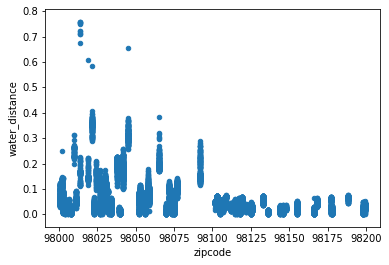

In [10]:
house.plot.scatter('zipcode', 'water_distance')

# Creating log and sqrt to test the data

In [11]:
house['price_log'] = np.log(house['price'])

In [ ]:
house['price_sqrt'] = np.sqrt(house['price'])

# Analyzing the data by numbers

In [ ]:
house.groupby('zipcode')['price'].describe().sort_values('mean', ascending = False)

In [ ]:
house.groupby('view')['price'].describe()

In [ ]:
house.groupby('grade')['price'].describe()

# EDA using graphs

In [ ]:
practice.plot.scatter('water_distance', 'view')

In [ ]:
house.plot.scatter('sqft_living', 'price')

# standard linear regression

In [ ]:
house.plot.scatter('sqft_lot', 'price')

# ??? weird curve

In [ ]:
house.plot.scatter('floors', 'price')

In [ ]:
house.plot.scatter('bedrooms', 'price')

# ??? not sure what this could mean, possibly remove or group up 

In [ ]:
house.plot.scatter('bathrooms', 'price')

# fairly linear but still not a great indicator

In [ ]:
house.plot.scatter('view', 'price')

# view doesnt seem to have a great relation

In [ ]:
house.plot.scatter('grade', 'price')

# some linear relation but possibly a logistic relation 

In [ ]:
house.plot.scatter('condition', 'price')

# possibly groupy by 3 and higher or less than 3 since there is a big difference

In [ ]:
house.plot.scatter('yr_built', 'price')

In [ ]:
house.plot.scatter('yr_renovated', 'price')

In [ ]:
# for the year columns, we could add them together and put it as a column of years since last reno

In [ ]:
house.plot.scatter('sqft_above', 'price')

# very similar to sqft_living so possibly 

In [ ]:
house.plot.scatter('sqft_basement', 'price')

# some linearity but not very (possibly create a column of 0s and 1 to see 
# if they place has a basement and if there is any correlation)

# Creating a new columns for latest renovation

In [12]:
years_since_renovation = []
for i in range(len(house['yr_built'])):
    if house['yr_renovated'][i] > house['yr_built'][i]:
        years_since_renovation.append(int(house.date[i][0:4]) - house['yr_renovated'][i])
    else:
        years_since_renovation.append(int(house.date[i][0:4]) - house['yr_built'][i])

In [13]:
house['last_change'] = years_since_renovation

# Creating a column to practice on so we still have the original house data

In [14]:
practice = house

# Converting Basement sqft to a column of 1s and zeros for whether or not there is a basement

In [15]:
practice['basement'] = np.where(practice['sqft_basement'] > 0, 1, 0)

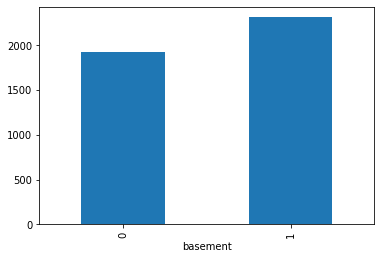

In [17]:
practice.groupby('basement')['sqft_living'].mean().plot.bar()

# items to remove
id

date

sqft_above

sqft_basement

sqft_living15

sqft_lot15

yr_built

yr_renovated

lat

long


# items to turn into dummies
view

condition

grade

zip code

# Dropping columns deemed unnecessary due to very low correlation

In [18]:
practice.drop(columns = ['id', 'date', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
              'yr_built', 'yr_renovated', 'lat', 'long', 'waterfront'], axis = 1, inplace = True)

# Creating dummy columns

In [104]:
zip_dummy = pd.get_dummies(practice['zipcode'], prefix = 'zip', drop_first = True)
# view_dummy = pd.get_dummies(practice['view'], prefix = 'view', drop_first = True)
grade_dummy = pd.get_dummies(practice['grade'], prefix = 'grade', drop_first = True)
# condition_dummy = pd.get_dummies(practice['condition'], prefix = 'condition', drop_first = True)

In [105]:
grade_dummy.drop(columns = ['grade_3', 'grade_4', 'grade_5','grade_8'], axis=1, inplace = True)

In [106]:
# view_dummy.drop(columns = ['view_1'], axis=1, inplace = True)

In [107]:
zip_dummy = zip_dummy[['zip_98004', 'zip_98039', 'zip_98040', 'zip_98112']]

# Creating new df to include all dummies

In [108]:
full_practice = pd.concat([practice, zip_dummy, grade_dummy], axis = 1)


In [ ]:
full_practice.head()

# Dropping extra columns that were made into dummies

In [109]:
full_practice.drop(columns = ['view', 'condition', 'grade', 'zipcode', 
                              'sqft_lot', 'floors', 'bedrooms', 'bathrooms'], axis = 1, inplace = True)

In [110]:
# Dropped sqft_lot as it was not a good indicator according to the model and correlation

In [111]:
full_practice.corr()

,price,sqft_living,water_distance,price_log,last_change,basement,zip_98004,zip_98039,zip_98040,zip_98112,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,grade_13
price,1.000000,0.703540,-0.205132,0.886244,-0.104828,0.176970,0.270366,0.219701,0.199329,0.174365,-0.206989,-0.312121,0.232428,0.332676,0.355224,0.307231,0.233989
sqft_living,0.703540,1.000000,-0.003750,0.696895,-0.343313,0.203606,0.113783,0.096565,0.125568,0.055769,-0.311957,-0.354918,0.318358,0.362762,0.346887,0.248618,0.153617
water_distance,-0.205132,-0.003750,1.000000,-0.242848,-0.221472,-0.215618,-0.071224,-0.033350,-0.092146,-0.055904,-0.016349,0.032942,0.006611,-0.044520,-0.028789,-0.016587,-0.011380
price_log,0.886244,0.696895,-0.242848,1.000000,-0.131341,0.209185,0.220310,0.133954,0.185179,0.158702,-0.309503,-0.337850,0.311199,0.334351,0.283155,0.184918,0.099017
last_change,-0.104828,-0.343313,-0.221472,-0.131341,1.000000,0.144874,-0.014971,-0.014760,-0.011797,0.077343,0.320528,0.221480,-0.235679,-0.148742,-0.093258,-0.044979,-0.014077
basement,0.176970,0.203606,-0.215618,0.209185,0.144874,1.000000,0.015993,0.008338,0.038167,0.060725,-0.109137,0.060897,-0.042500,-0.003487,0.010055,0.017755,0.026620
zip_98004,0.270366,0.113783,-0.071224,0.220310,-0.014971,0.015993,1.000000,-0.005817,-0.013658,-0.013260,-0.029796,-0.051943,0.033855,0.066886,0.068853,0.054172,0.016753
zip_98039,0.219701,0.096565,-0.033350,0.133954,-0.014760,0.008338,-0.005817,1.000000,-0.005717,-0.005550,-0.016017,-0.027295,0.021230,0.009719,0.080542,0.069789,0.091946
zip_98040,0.199329,0.125568,-0.092146,0.185179,-0.011797,0.038167,-0.013658,-0.005717,1.000000,-0.013031,-0.028991,-0.068924,0.042134,0.089547,0.085622,0.031790,-0.002923
zip_98112,0.174365,0.055769,-0.055904,0.158702,0.077343,0.060725,-0.013260,-0.005550,-0.013031,1.000000,-0.025869,-0.047270,0.055450,0.044337,0.027144,0.008899,-0.002838


# Making the features column

In [112]:
features_columns = []
for x in full_practice.columns:
    if 'price' not in x:
        features_columns.append(x)
    else:
        pass

# Removing all extreme values from the data set

In [113]:
def ext_values(df, extreme_cols):
    new_df = df.copy()
    for col in extreme_cols:
        std = new_df[col].std()
        mean = new_df[col].mean()
        value = mean+(6*std)
        new_df[col] = new_df[col].apply(lambda x: value if (x-mean > 6*std) else x)
    return new_df

In [114]:
full_practice = ext_values(full_practice, features_columns)

In [115]:
lr_model = ols(formula = 'price_log~sqft_living+water_distance+last_change+basement+grade_6+grade_7+grade_9+grade_10+grade_11+grade_12+grade_13+zip_98004+zip_98039+zip_98040+zip_98112', data = full_practice).fit()

In [116]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2139.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        16:21:40   Log-Likelihood:                -4375.7
No. Observations:               17290   AIC:                             8783.
Df Residuals:                   17274   BIC:                             8907.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.5421      0.011   1165.043      0.000      12.521      12.563
sqft_living        0.0002   4.27e-06     56.842      0.000       0.000       0.000
water_distance    -1.3098      0.038    -34.657      0.000      -1.384      -1.236
last_change        0.0026    9.9e-05     26.713      0.000       0.002       0.003
basement           0.0485      0.005      9.045      0.000       0.038       0.059
grade_6           -0.4083      0.010    -40.200      0.000      -0.428      -0.388
grade_7           -0.1877      0.006    -30.422      0.000      -0.200      -0.176
grade_9            0.2210      0.009     25.191      0.000       0.204       0.238
grade_10           0.3340      0.013     25.987      0.000       0.309       0.359
grade_11           0.4954      0.025     19.930      0.000       0.447       0.544
grade_12           1.3436      0.102     13.213      0.000       1.144       1.543
grade_13           4.4303      0.635      6.979      0.000       3.186       5.675
zip_98004          0.7858      0.029     27.068      0.000       0.729       0.843
zip_98039          2.3086      0.164     14.100      0.000       1.988       2.630
zip_98040          0.4741      0.030     15.709      0.000       0.415       0.533
zip_98112          0.5816      0.032     18.245      0.000       0.519       0.644
==============================================================================
Omnibus:                      476.613   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.753
Skew:                          -0.317   Prob(JB):                    9.86e-141
Kurtosis:                       3.703   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Creating target variable and features

In [117]:
target = np.log(full_practice['price'])
features = full_practice[features_columns]

# Train, test split on the target and features

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23,test_size=0.2)  

In [ ]:
X_scale = X_train

# Scaling all the data using a standard scalar

In [ ]:
scaler = StandardScaler()
final_scaler = scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=features_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=features_columns)

# Standard linear regression using scikit

In [127]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = np.exp(lm.predict(X_train))

train_rmse = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

y_pred = np.exp(lm.predict(X_test))

test_rmse = np.sqrt(metrics.mean_squared_error((y_test), y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', float(train_rmse), "vs. Testing: ", float(test_rmse))

Training Root Mean Squared Error: 620713.6362109312
Testing Root Mean Squared Error: 594164.5838687308
Training:  620713.6362109312 vs. Testing:  594164.5838687308


# Plotting Residuals to test

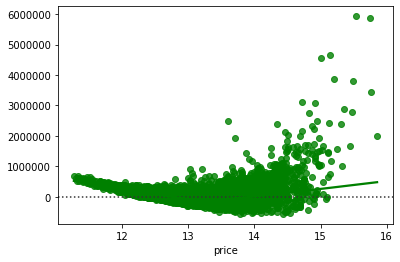

In [128]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

# Applying recursive feature elimination

In [129]:
from sklearn.feature_selection import RFECV

In [130]:
ols = linear_model.LinearRegression()

In [131]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [132]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [133]:
list(removed_rfe)

[]

In [134]:
len(selected_rfe)

15

In [135]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_train_pred_rfe = np.exp(lm_rfe.predict(X_train[selected_rfe]))

train_rmse_rfe = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred_rfe))


print('Training Root Mean Squared Error:' , train_rmse_rfe)

y_pred_rfe = np.exp(lm_rfe.predict(X_test[selected_rfe]))

test_rmse_rfe = np.sqrt(metrics.mean_squared_error((y_test), y_pred_rfe))

print('Testing Root Mean Squared Error:' , test_rmse_rfe)


print("vs. Testing: ", float(test_rmse), 
      "vs. Testing rfe: ", float(test_rmse_rfe))

Training Root Mean Squared Error: 620713.6362109312
Testing Root Mean Squared Error: 594164.5838687308
vs. Testing:  594164.5838687308 vs. Testing rfe:  594164.5838687308


# Applying Ftest selection

In [122]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)

selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x1a1d1be950>)

In [123]:
selected_ftest = X_train.columns[selector.get_support()]
removed_ftest = X_train.columns[~selector.get_support()]

In [124]:
list(removed_ftest)

[]

In [125]:
list(selected_ftest)

['sqft_living',
 'water_distance',
 'last_change',
 'basement',
 'zip_98004',
 'zip_98039',
 'zip_98040',
 'zip_98112',
 'grade_6',
 'grade_7',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [126]:
#instantiate a linear regression object
lm_ftest = LinearRegression()

#fit the linear regression to the data
lm_ftest = lm_ftest.fit(X_train[selected_ftest], y_train)

y_train_pred_ftest = lm_ftest.predict((X_train[selected_ftest]))

train_rmse_ftest = np.sqrt(metrics.mean_squared_error((y_train), y_train_pred_ftest))


print('Training Root Mean Squared Error:' , train_rmse_ftest)

y_pred_ftest = np.exp(lm_ftest.predict((X_test[selected_ftest])))

test_rmse_ftest = np.sqrt(metrics.mean_squared_error((y_test), y_pred_ftest))

print('Testing Root Mean Squared Error:' , test_rmse_ftest)


print("vs. Testing: ", float(test_rmse), 
      "vs. Testing rfe: ", float(test_rmse_rfe),
      "vs. Testing ftest: ", float(test_rmse_ftest))

Training Root Mean Squared Error: 0.31185527947201874
Testing Root Mean Squared Error: 594164.5838687308
vs. Testing:  566584.0568528462 vs. Testing rfe:  584208.521750679 vs. Testing ftest:  594164.5838687308


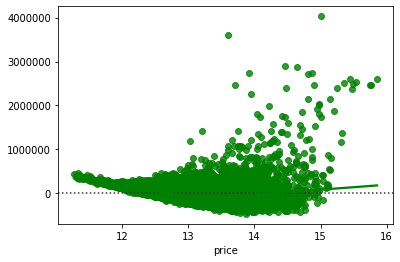

In [136]:
sns.residplot( y_train, y_train_pred_lasso,lowess=True, color="g")

# Applying lasso method

In [120]:
from sklearn.linear_model import Lasso

In [137]:
lasso = Lasso(alpha=0.01, max_iter = 5000, normalize=False)

final_lasso = lasso.fit(X_train,y_train)

y_train_pred_lasso = np.exp(lasso.predict(X_train))
y_pred_lasso = np.exp(lasso.predict(X_test))

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_lasso)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
print('Training Error: '+ str(train_rmse))
print('Testing Error: '+ str(test_rmse))

Training Error: 506791.88545134297
Testing Error: 566584.0568528462


In [138]:
with open('final_lasso', 'wb') as handle:
    pickle.dump(final_lasso, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('final_scaler', 'wb') as handle:
    pickle.dump(X_scale, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('final_rfe', 'wb') as handle:
    pickle.dump(lm_rfe, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
sns.residplot(y_train, y_train_pred_lasso,lowess=True, color="g")

# Attempting Variance Inflation Method

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(5).head(21)

,VIF Factor,features
0,6.27379,sqft_living
1,2.00323,water_distance
2,3.63912,last_change
3,2.00565,basement
4,1.04183,zip_98004
5,1.02760,zip_98039
6,1.05026,zip_98040
7,1.03963,zip_98112
8,1.55508,grade_6
9,2.31290,grade_7
